In [1]:
%matplotlib inline

import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm

import utils

sns.set_context("notebook", font_scale=1)
plt.rcParams['figure.figsize'] = (17, 5)

In [2]:
import os
if not os.path.exists('clean_data'):
    os.makedirs('clean_data')
    
#clean_tracks.to_pickle('clean_data/track.pkl')
#clean_features.to_pickle('clean_data/features.pkl')

In [3]:
unpickled_df = pd.read_pickle("clean_data/track.pkl")
unpickled_df

date_created  duration genre_top                   title  \
track_id                                                                   
2        2008-11-26 01:48:12       168   Hip-Hop                    Food   
3        2008-11-26 01:48:14       237   Hip-Hop            Electric Ave   
5        2008-11-26 01:48:20       206   Hip-Hop              This World   
10       2008-11-25 17:49:06       161       Pop                 Freeway   
134      2008-11-26 01:43:19       207   Hip-Hop            Street Music   
...                      ...       ...       ...                     ...   
124718   2015-09-08 20:57:58       202   Hip-Hop    Rewind Feat Angelous   
124719   2015-09-08 20:58:00       201   Hip-Hop  Never Feat Tina Quallo   
124720   2015-09-08 20:58:00       181   Hip-Hop             Self Hatred   
124721   2015-09-08 20:58:01       140   Hip-Hop       Revenge Feat Nova   
124722   2015-09-08 20:58:03       169   Hip-Hop                    Rain   

                         album  album_tracks     artist    location  \
track_id                                                              
2         AWOL - A Way Of Life             7       AWOL  New Jersey   
3         AWOL - A Way Of Life             7       AWOL  New Jersey   
5         AWOL - A Way Of Life             7       AWOL  New Jersey   
10           Constant Hitmaker             2  Kurt Vile         NaN   
134       AWOL - A Way Of Life             7       AWOL  New Jersey   
...                        ...           ...        ...         ...   
124718            The Red Tape            -1  K. Sparks  Queens, NY   
124719            The Red Tape            -1  K. Sparks  Queens, NY   
124720            The Red Tape            -1  K. Sparks  Queens, NY   
124721            The Red Tape            -1  K. Sparks  Queens, NY   
124722            The Red Tape            -1  K. Sparks  Queens, NY   

          acousticness  danceability    energy  instrumentalness  liveness  \
track_id                                                                     
2             0.416675      0.675894  0.634476      1.062807e-02  0.177647   
3             0.374408      0.528643  0.817461      1.851103e-03  0.105880   
5             0.043567      0.745566  0.701470      6.967990e-04  0.373143   
10            0.951670      0.658179  0.924525      9.654270e-01  0.115474   
134           0.452217      0.513238  0.560410      1.944269e-02  0.096567   
...                ...           ...       ...               ...       ...   
124718        0.412194      0.686825  0.849309      6.000000e-10  0.867543   
124719        0.054973      0.617535  0.728567      7.215700e-06  0.131438   
124720        0.010478      0.652483  0.657498      7.098000e-07  0.701523   
124721        0.067906      0.432421  0.764508      1.625500e-06  0.104412   
124722        0.153518      0.638660  0.762567      5.000000e-10  0.264847   

          speechiness    tempo   valence  
track_id                                  
2            0.159310  165.922  0.576661  
3            0.461818  126.957  0.269240  
5            0.124595  100.260  0.621661  
10           0.032985  111.562  0.963590  
134          0.525519  114.290  0.894072  
...               ...      ...       ...  
124718       0.367315   96.104  0.692414  
124719       0.243130   96.262  0.399720  
124720       0.229174   94.885  0.432240  
124721       0.310553  171.329  0.580087  
124722       0.303372   77.842  0.656612  

[9355 rows x 16 columns]

In [4]:
data= unpickled_df

In [5]:
data.columns

Index(['date_created', 'duration', 'genre_top', 'title', 'album',
       'album_tracks', 'artist', 'location', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')

In [6]:
data.shape

(9355, 16)

In [8]:
data.shape

(9355, 16)

MATRIZ DE CORRELACIÓN

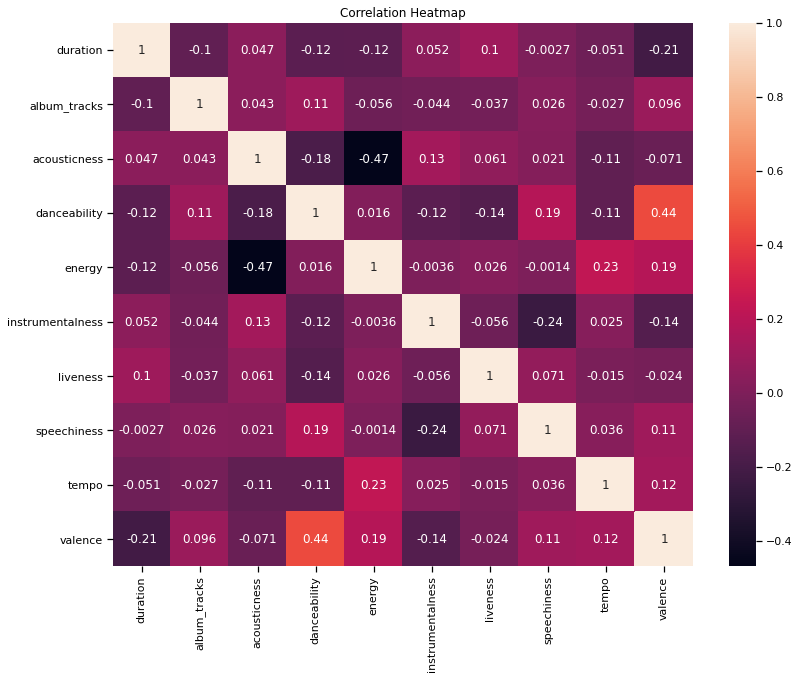

In [9]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [10]:
data.genre_top.value_counts()

Rock                   3892
Electronic             2170
Hip-Hop                 910
Folk                    874
Old-Time / Historic     357
Pop                     346
Classical               265
Jazz                    241
International           133
Instrumental             84
Blues                    66
Experimental             17
Name: genre_top, dtype: int64

In [15]:
Data1= pd.get_dummies(data.genre_top)
data= pd.concat([data, Data1], 1)
data.shape

(9355, 28)

In [16]:
data.columns

Index(['date_created', 'duration', 'genre_top', 'title', 'album',
       'album_tracks', 'artist', 'location', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo',
       'valence', 'Blues', 'Classical', 'Electronic', 'Experimental', 'Folk',
       'Hip-Hop', 'Instrumental', 'International', 'Jazz',
       'Old-Time / Historic', 'Pop', 'Rock'],
      dtype='object')

Text(0, 0.5, 'Tracks')

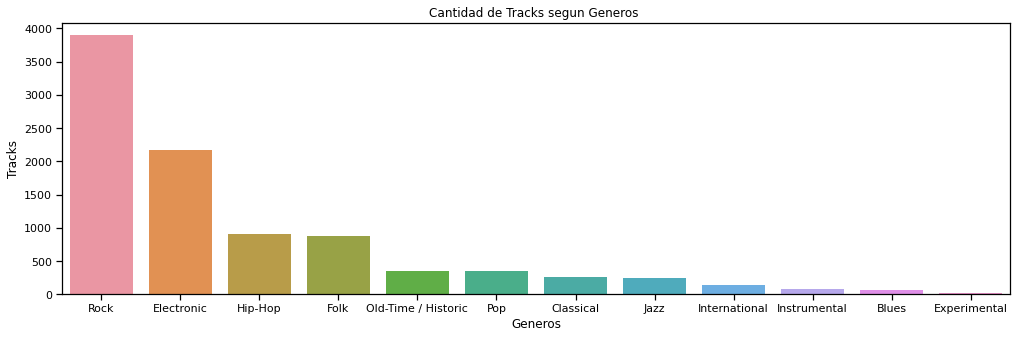

In [23]:
sns.barplot(data.genre_top.value_counts().index, data.genre_top.value_counts(), order=list(data.genre_top.value_counts().index))
plt.title("Cantidad de Tracks segun Generos ")
plt.xlabel("Generos")
plt.ylabel("Tracks")

Correlacion entre variables

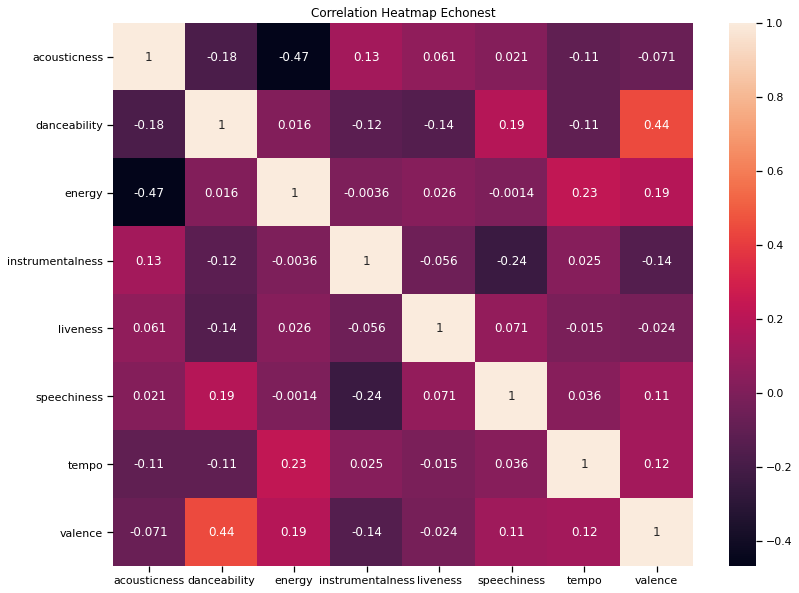

In [24]:
#Correlacion entre Variables de echones 
lista_echones=['acousticness', 'danceability','energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo','valence']

plt.figure(figsize=(13,10))
sns.heatmap(data[lista_echones].corr(),annot=True)
plt.title("Correlation Heatmap Echonest")
plt.show()

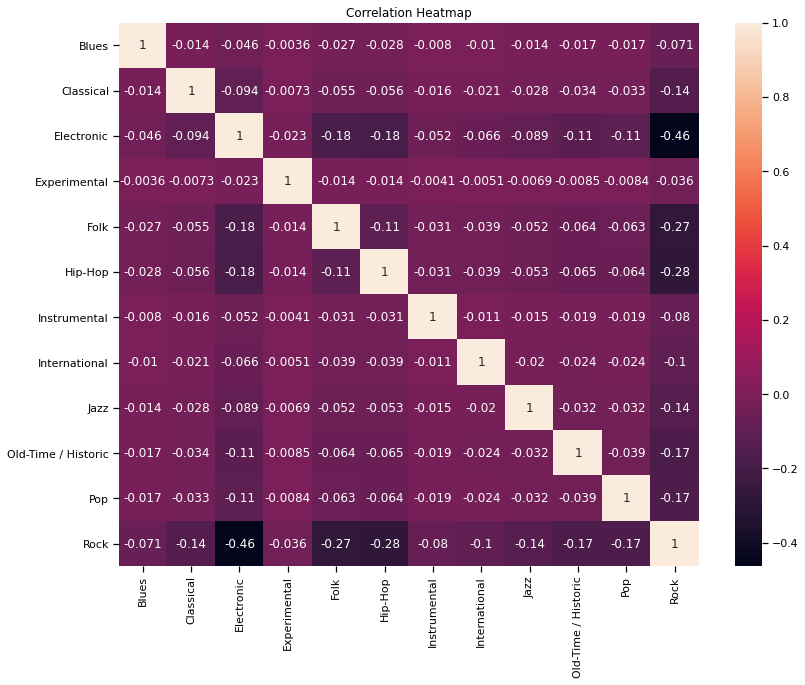

In [25]:
#Correlacion entre Generos 
lista_generos=['Blues', 'Classical', 'Electronic', 'Experimental', 'Folk',
       'Hip-Hop', 'Instrumental', 'International', 'Jazz',
       'Old-Time / Historic', 'Pop', 'Rock']

plt.figure(figsize=(13,10))
sns.heatmap(data[lista_generos].corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [56]:
#Funcion de heatmap por genero

def plot_genero(df, genero):
    plt.figure(figsize=(2,5))
    sns.heatmap(df.corr()[[genero]],annot=True)
    plt.title("Correlation Heatmap Echonest by GENERO: "+genero)
    plt.show()


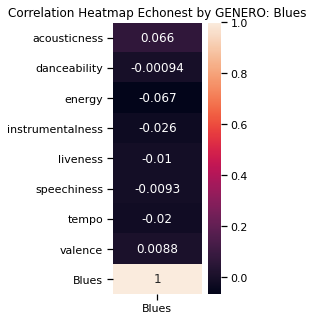

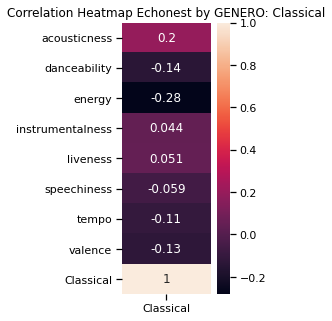

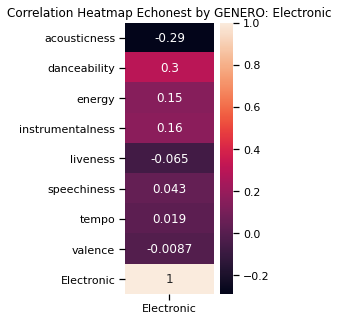

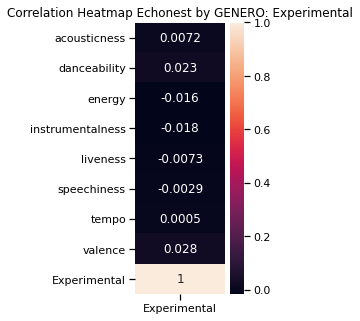

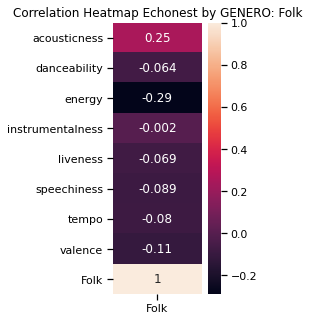

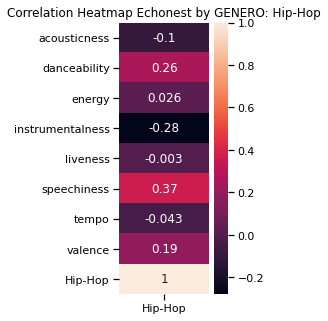

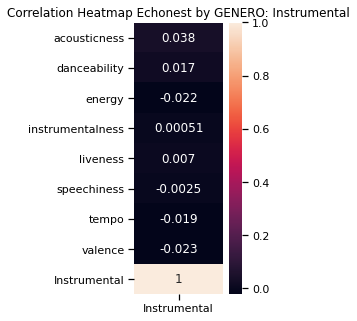

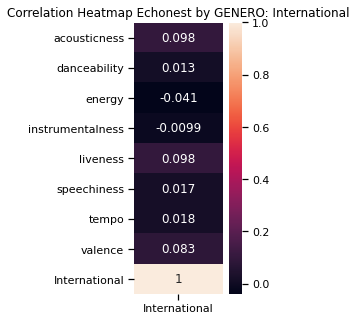

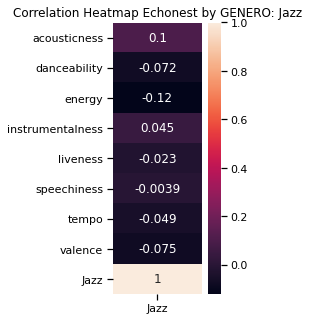

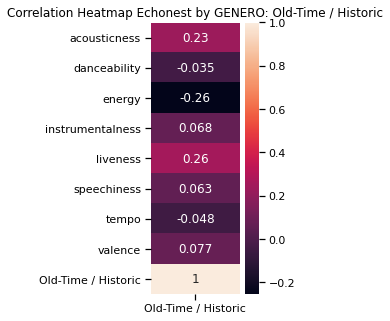

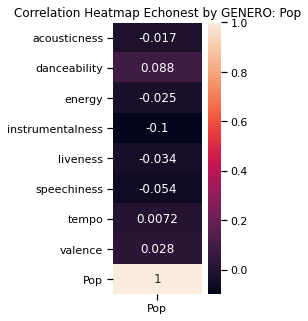

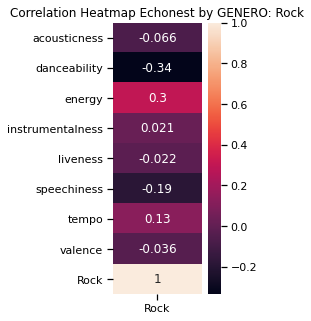

In [57]:
lista_echones=['acousticness', 'danceability','energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo','valence']

for x in lista_generos: 
    df=data[lista_echones +[x]]
    plot_genero(df, x)
    

Visuales de Fechas

<Figure size 1224x360 with 0 Axes>

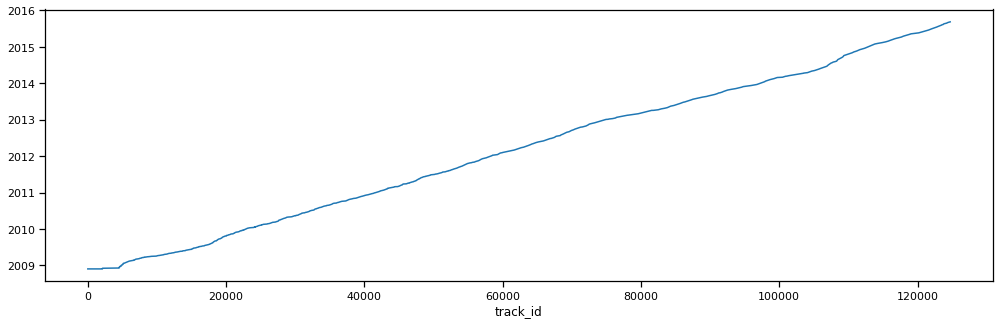

<Figure size 1224x360 with 0 Axes>

In [58]:
import time
import datetime
from datetime import date
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from bokeh.palettes import Category20
from bokeh.models import HoverTool

keys = data["genre_top"].unique()

colors = [Category20[20][i] for i in range(20) ]
colormap = dict(zip(keys, colors))
colormap

data['date_created'].plot()
plt.figure()

In [59]:
#Specify the selection tools to be made available
select_tools = ['box_zoom', 'pan', 'wheel_zoom', 'reset', 'crosshair', 'save']

# Format the tooltip
tooltips = [
    ('', '@Genero'),
    ("(x,y)", "($x, $y)")
]

# Create a blank figure with labels
p = figure(plot_width = 800, plot_height = 600, 
           title = 'Evolucion de los generos',
           x_axis_label = 'Fecha creacion', 
           y_axis_label = 'Tracks',
           tools=select_tools)


for genero in colormap.keys():
    genero_mask =  data['genre_top'] == genero    
    genero_data = data.loc[genero_mask]
    
    # Add line glyph
    p.line('coord_x', 'coord_y', line_width = 2,
           color = colormap[genero], alpha=0.8, 
           legend_label = genero, source = genero_data)
  
    # Add circle glyph
    p.circle('coord_x', 'coord_y', size = 6,
        color = colormap[genero], 
        legend_label = genero, source = genero_data)
    
    
p.legend.location = "top_left"
p.legend.click_policy='hide'

p.add_tools(HoverTool(tooltips=tooltips))


# Set to output the plot in the notebook
output_notebook()
# Show the plot
show(p)

Loading BokehJS ...

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "x" value "coord_x", key "y" value "coord_y" [renderer: GlyphRenderer(id=1037, glyph=Line(id='1035', ...), ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "x" value "coord_x", key "y" value "coord_y" [renderer: GlyphRenderer(id=1051, glyph=Circle(id='1049', ...), ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "x" value "coord_x", key "y" value "coord_y" [renderer: GlyphRenderer(id=1065, glyph=Line(id='1063', ...), ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_

Visuales de Duracion

Text(0, 0.5, 'Duracion')

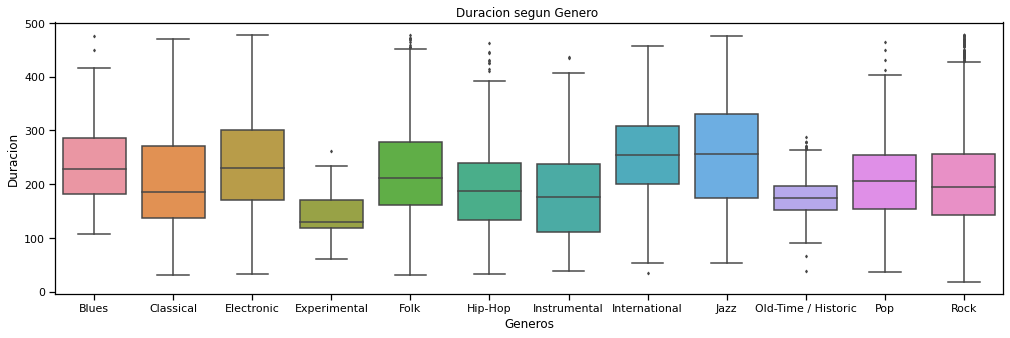

In [61]:
ax = sns.boxplot(x="genre_top", y="duration", data=data, fliersize=2)
plt.title("Duracion segun Genero ")
plt.xlabel("Generos")
plt.ylabel("Duracion")

In [67]:
def boxplot_echonest (df, echonest):
    ax = sns.boxplot(x="genre_top", y=echonest,data= data, fliersize=2)
    plt.title("Genero por  "+ echonest)
    plt.xlabel("Generos")
    plt.ylabel(echonest)
    plt.show()

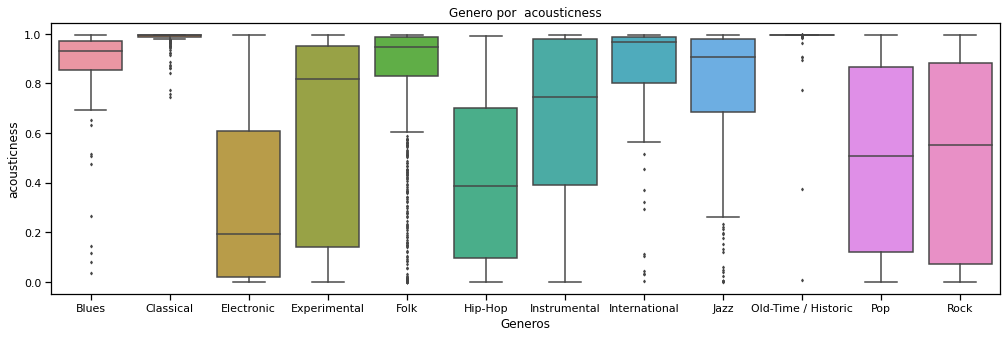

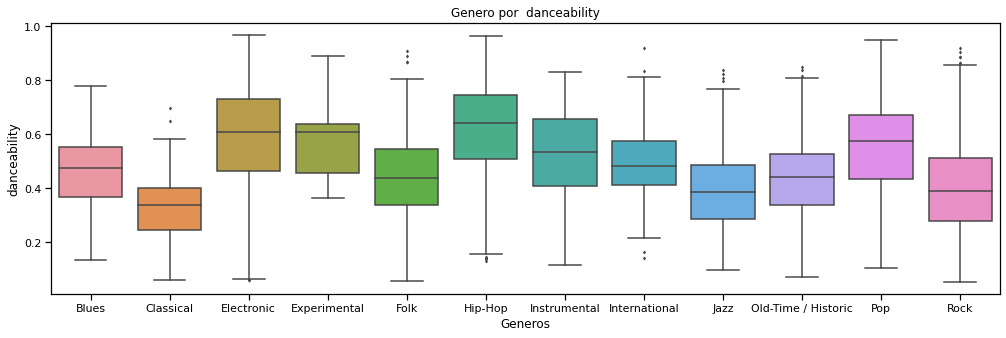

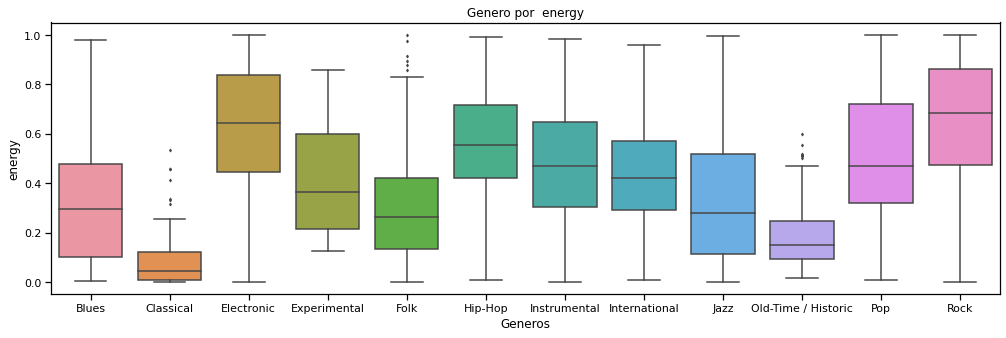

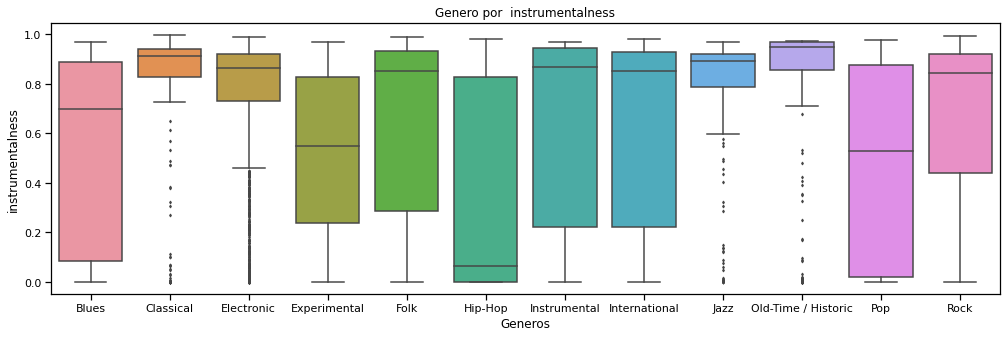

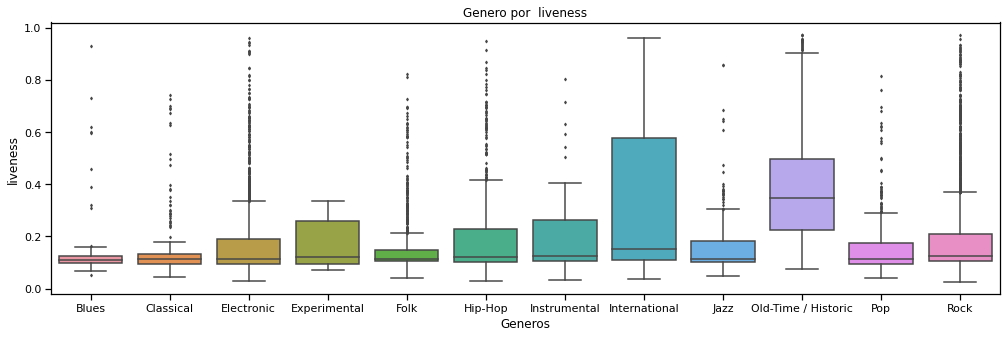

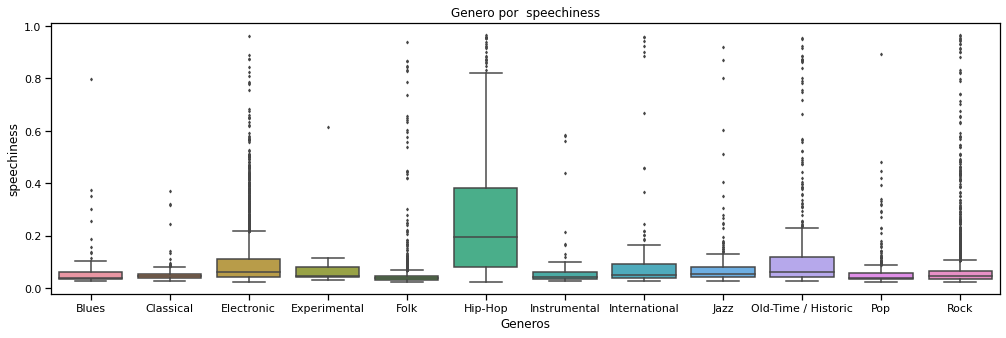

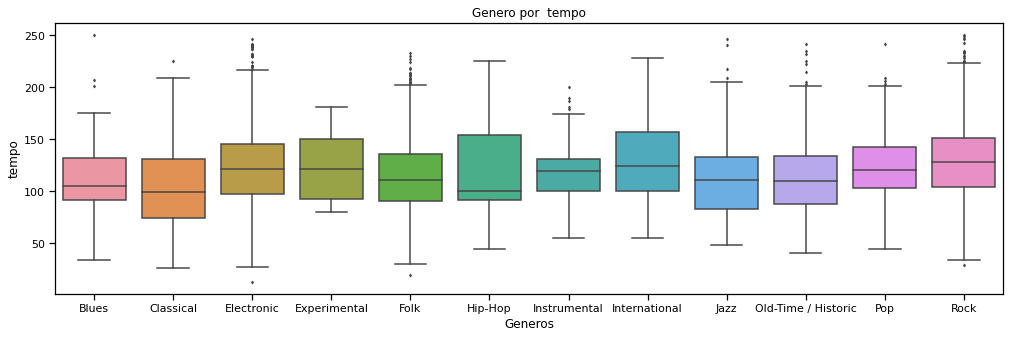

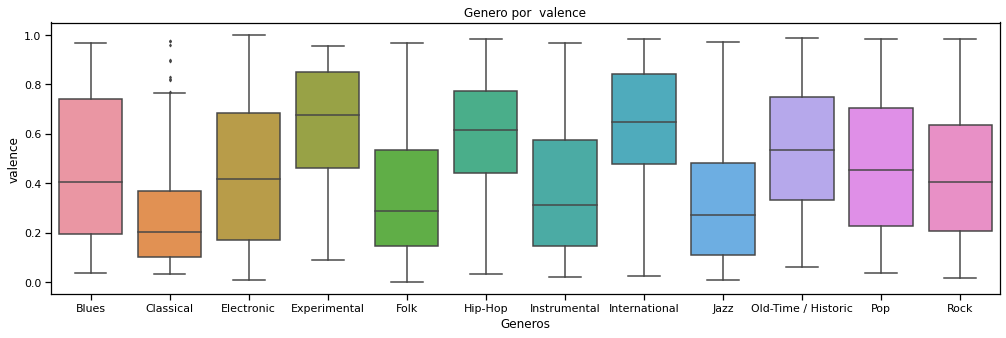

In [68]:
for x in lista_echones:
    boxplot_echonest (data,x)

In [69]:
data.genre_top.value_counts().index[0:5]
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence', 'genre_top']

full_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']

In [70]:
def compare_two_genres(df, genre_1, genre_2):
    _features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence', 'genre_top']
    compare_mask = (df.genre_top == genre_1) | (df.genre_top == genre_2)
    _df = df[compare_mask][_features]
    sns.pairplot(_df,hue='genre_top',  plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'});


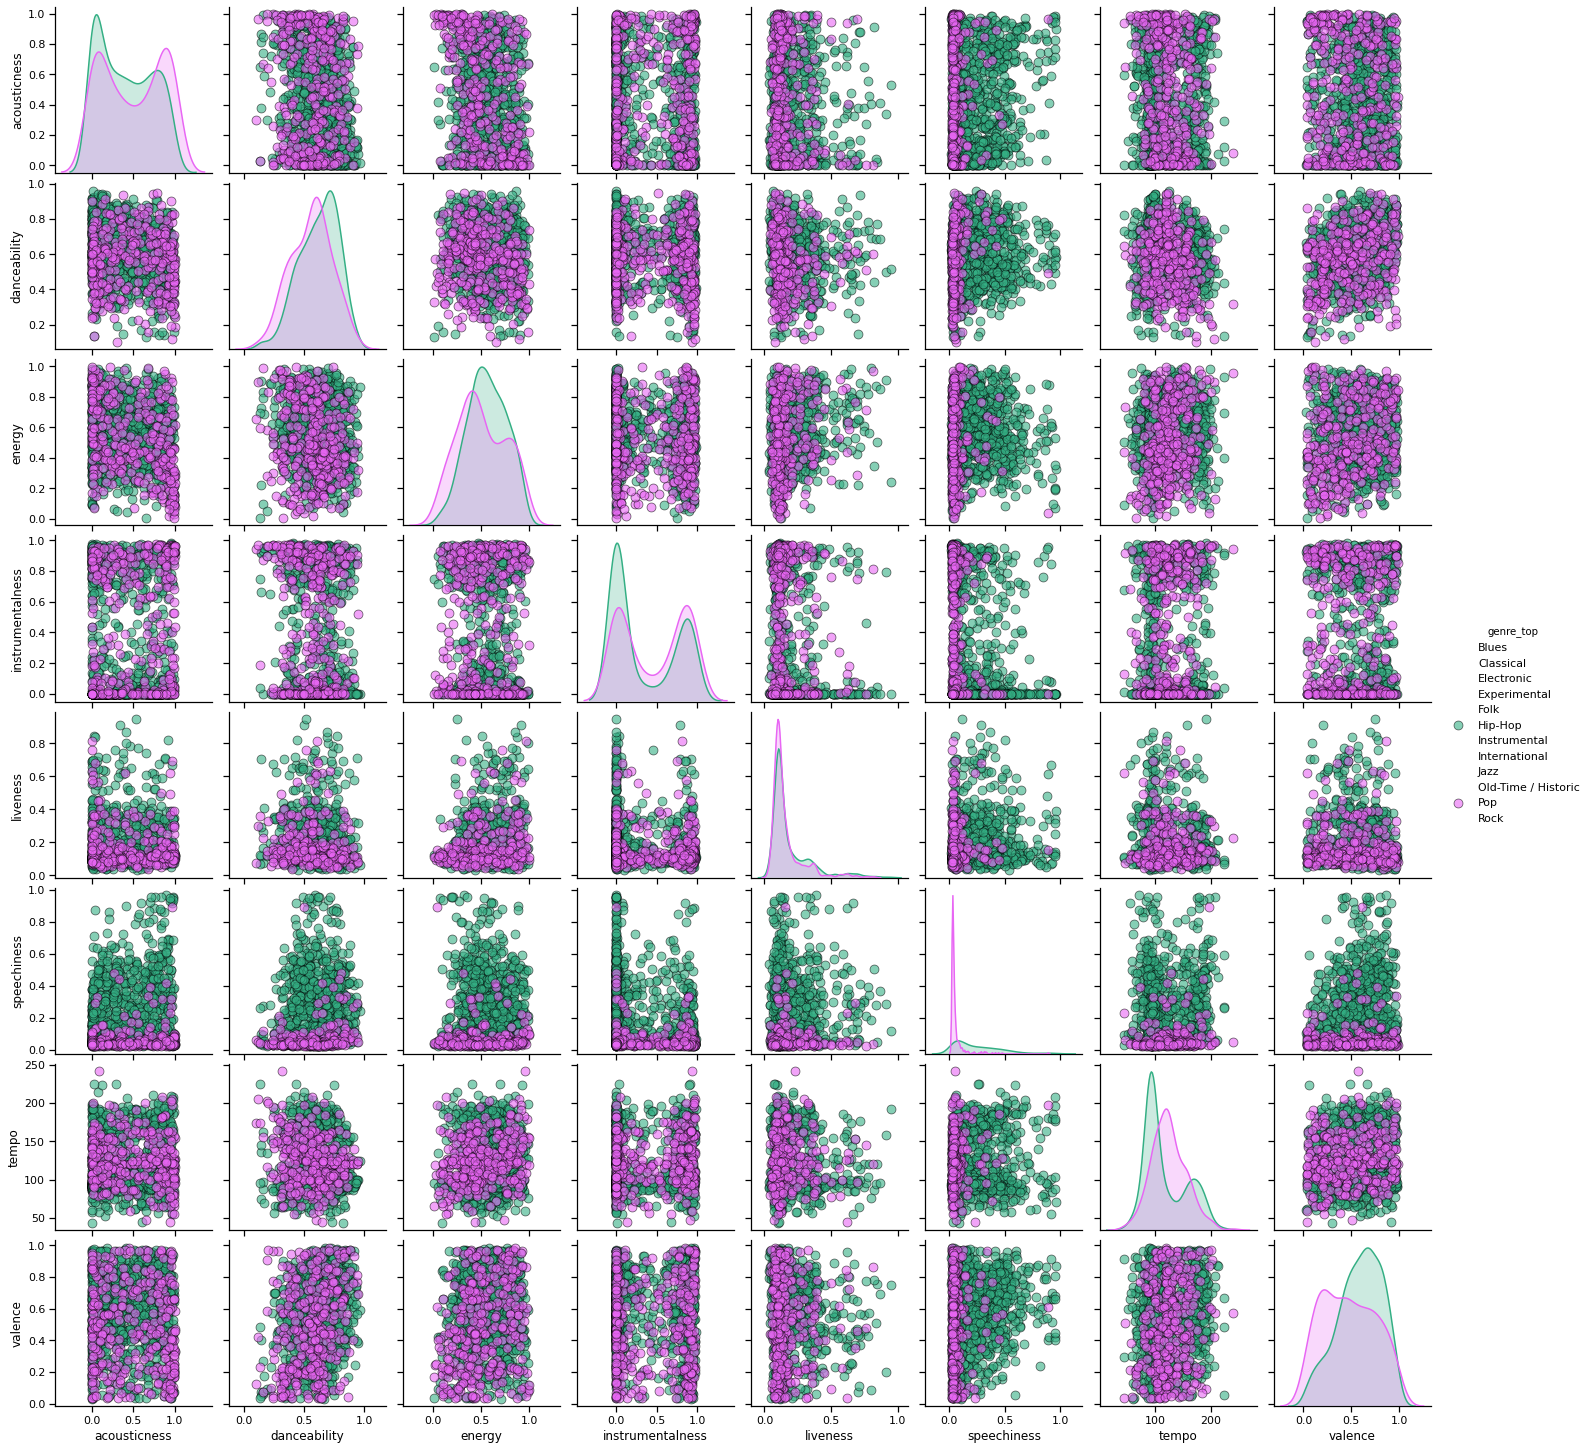

In [71]:
compare_two_genres(data, 'Hip-Hop', 'Pop')

In [81]:
def plot_features_profile(df, genre):
    angles = np.linspace(0, 2*np.pi, len(features), endpoint=False)
    labels = features
    stats = df[df.genre_top == genre][features].mean().values
    
    stats=np.concatenate((stats,[stats[0]]))
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_title( genre +  " Profile")
    ax.grid(True)
    
    plt.show()

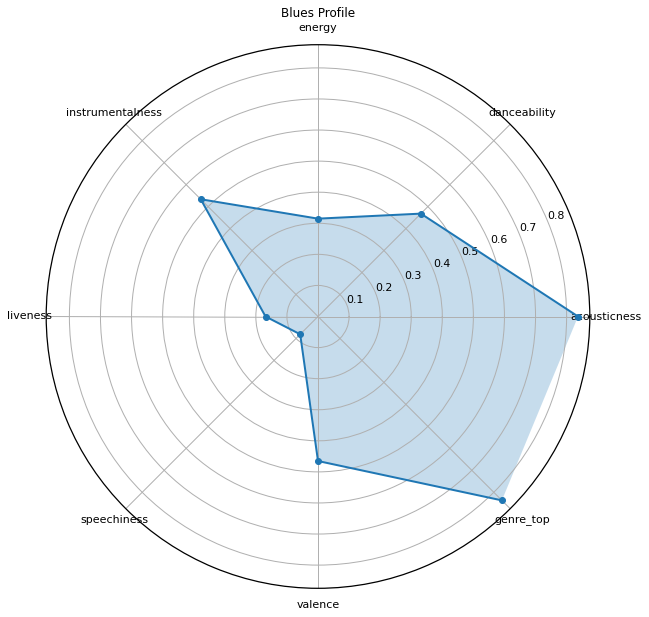

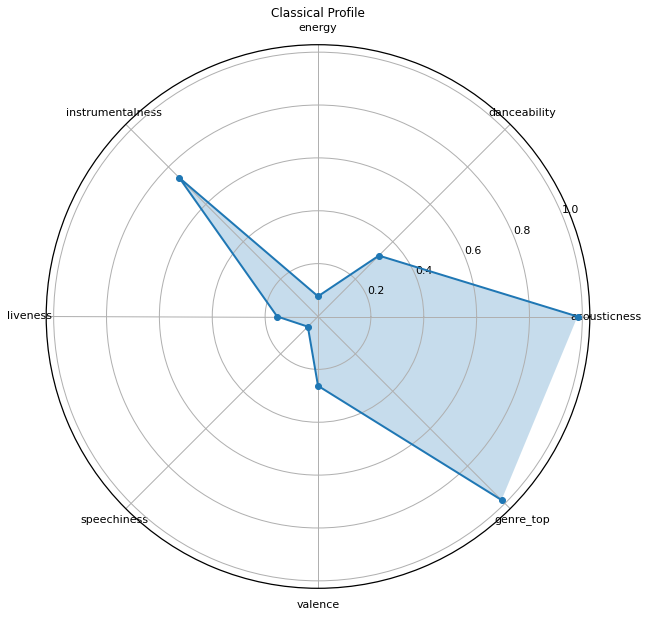

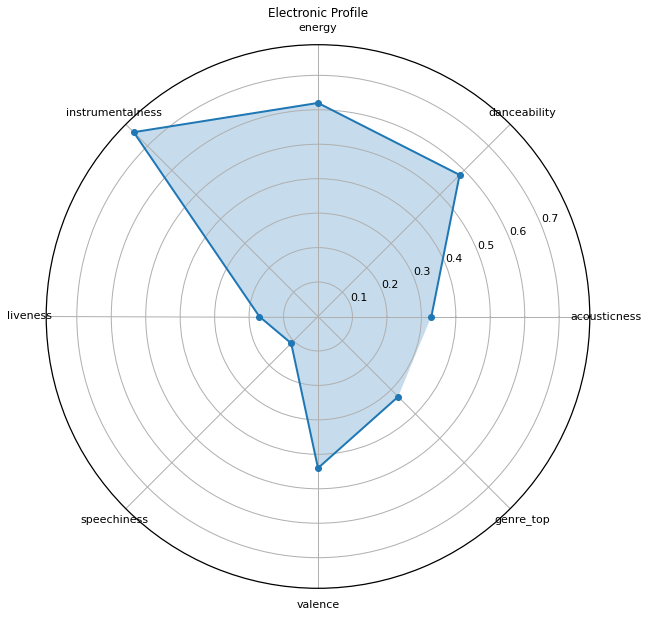

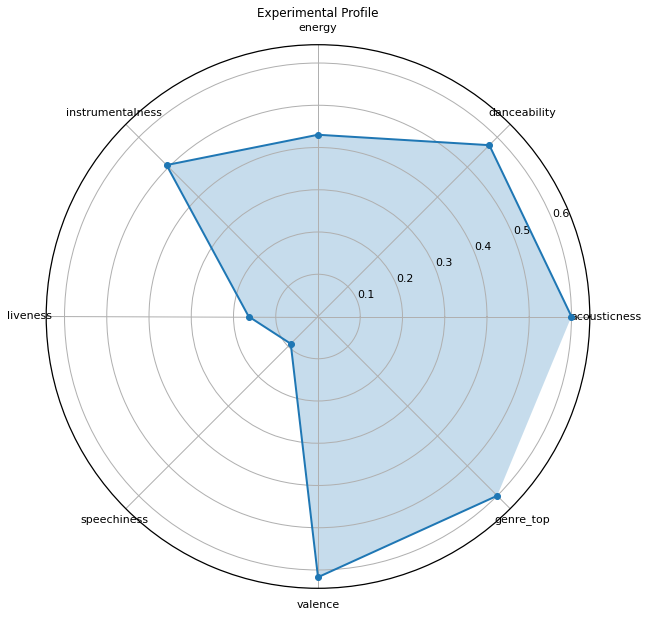

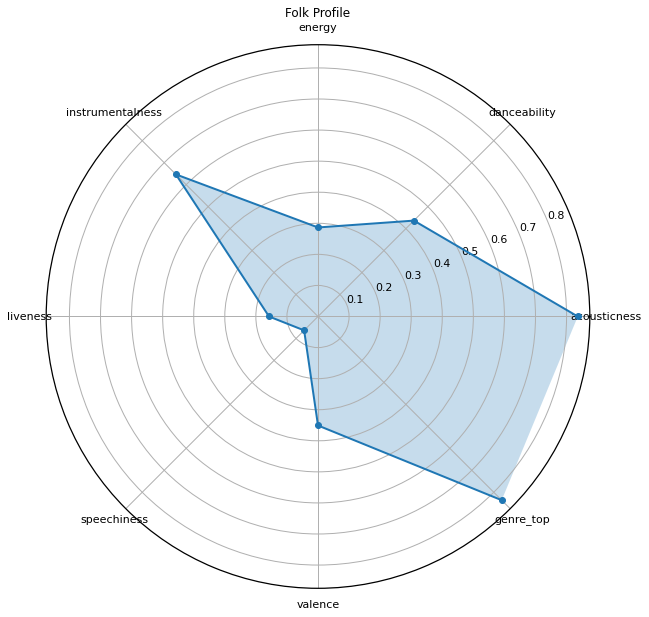

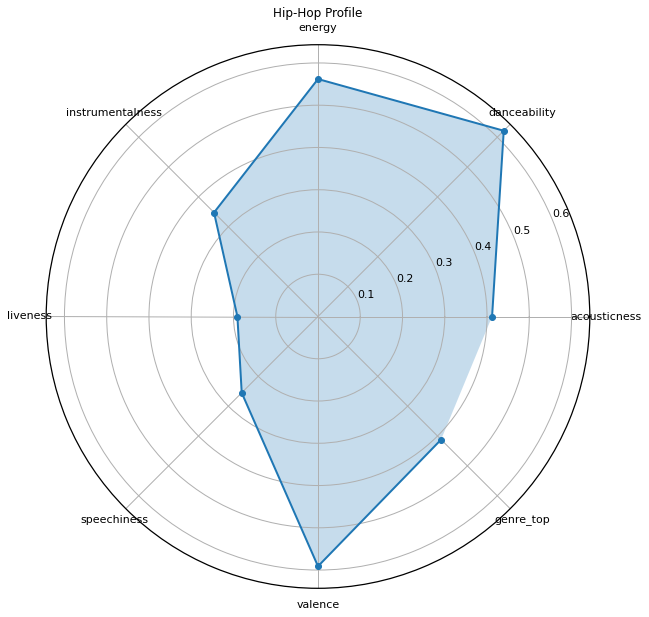

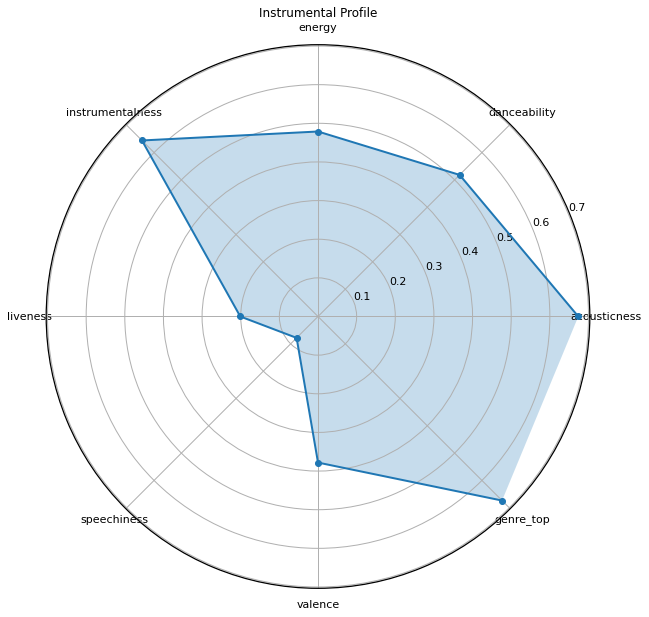

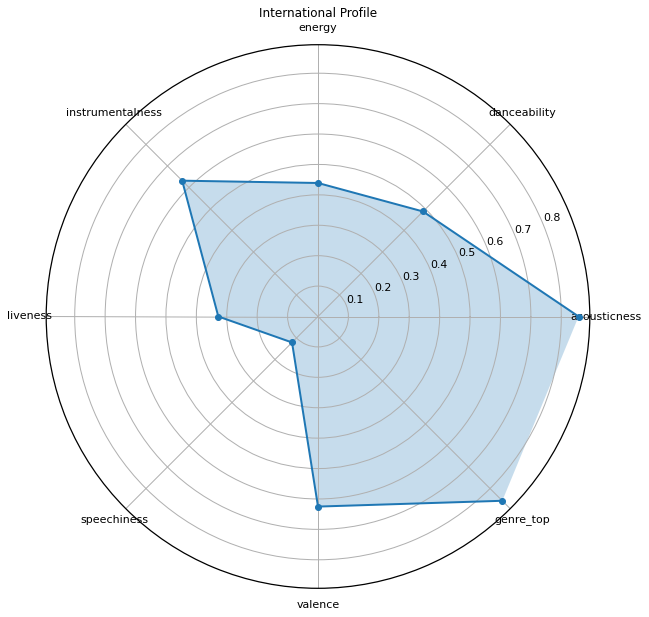

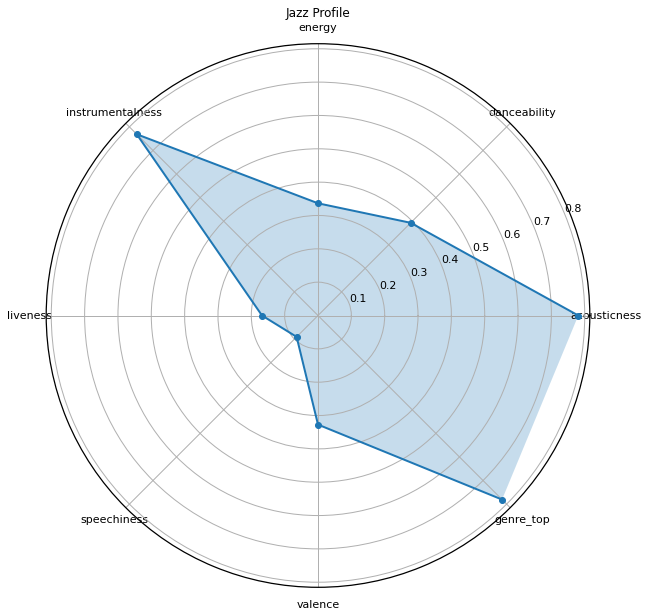

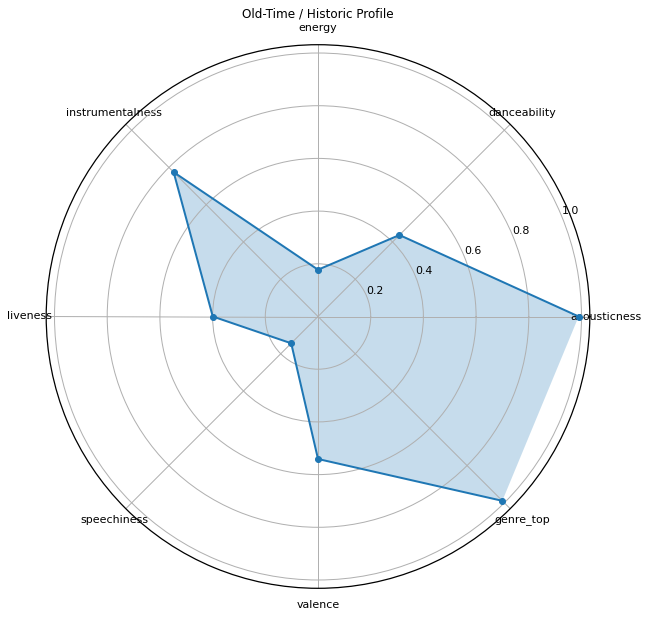

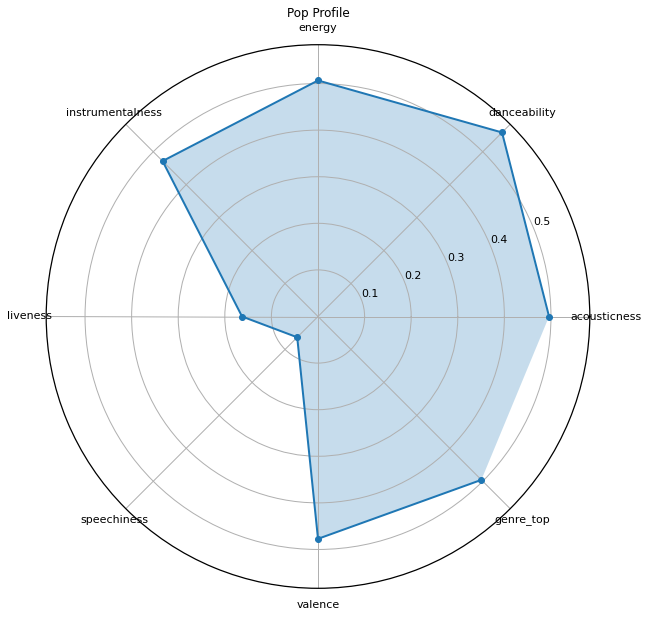

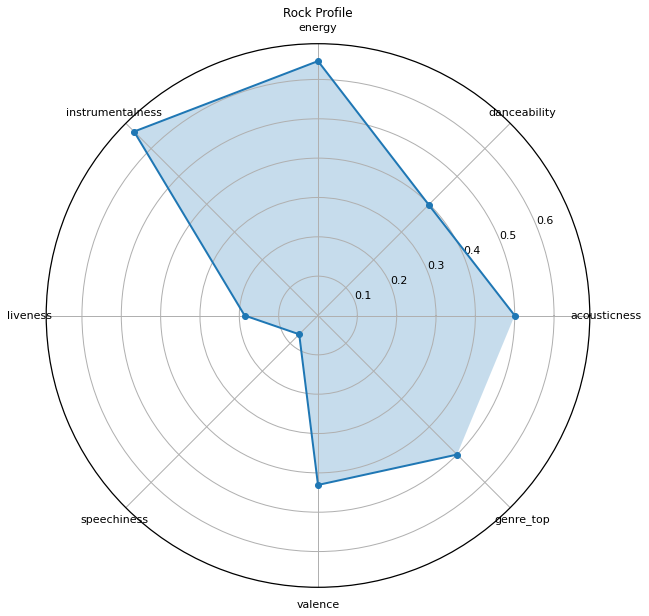

In [82]:
for x in lista_generos:
    plot_features_profile(data, x)

In [ ]:
# por localidad - ver dist de genero 
# por genero - ver localidad

In [87]:
top_localidades=data.location.value_counts().head(10)
top_localidades

Brooklyn, NY             365
New York, NY             189
San Francisco, CA        173
Chicago, IL              154
Baltimore, MD            118
Providence, RI           111
Columbus, OH             101
Richmond, Virginia        97
Italy                     93
South Portland, Maine     91
Name: location, dtype: int64

In [112]:
#data_location=data.groupby(["location"]).count()
#data_location[lista_generos]